In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
def produce_line(w , a=0 , b=10 , n=10 , is_reg=False):
    x = np.linspace(a,b,n)
    x_aug=np.column_stack((x,np.ones((n,1))))
    np.reshape(x,(n,1))
    if(is_reg):
        return [x ,reg.predict(np.reshape(x_aug , (n,2)))]
    w=np.array(w)
    return [x,np.dot(x_aug,w)]

In [139]:
def add_noise(t, sigma=0.1):
    # t : (x,y)
    t1 = np.copy(t)
    for i in range(len(t[1])) :
        mu = t[1][i]
        #print(mu)
        t1[1][i] +=  np.random.normal(0, sigma)
    return t1

In [140]:
t = produce_line([1,2])

In [90]:
t[1]

array([  2.        ,   3.01010101,   4.02020202,   5.03030303,
         6.04040404,   7.05050505,   8.06060606,   9.07070707,
        10.08080808,  11.09090909,  12.1010101 ,  13.11111111,
        14.12121212,  15.13131313,  16.14141414,  17.15151515,
        18.16161616,  19.17171717,  20.18181818,  21.19191919,
        22.2020202 ,  23.21212121,  24.22222222,  25.23232323,
        26.24242424,  27.25252525,  28.26262626,  29.27272727,
        30.28282828,  31.29292929,  32.3030303 ,  33.31313131,
        34.32323232,  35.33333333,  36.34343434,  37.35353535,
        38.36363636,  39.37373737,  40.38383838,  41.39393939,
        42.4040404 ,  43.41414141,  44.42424242,  45.43434343,
        46.44444444,  47.45454545,  48.46464646,  49.47474747,
        50.48484848,  51.49494949,  52.50505051,  53.51515152,
        54.52525253,  55.53535354,  56.54545455,  57.55555556,
        58.56565657,  59.57575758,  60.58585859,  61.5959596 ,
        62.60606061,  63.61616162,  64.62626263,  65.63

In [73]:
t = add_noise(t)

In [74]:
t[1]

array([  2.04999384,   3.02544355,   4.02035317,   4.94726793,
         5.81432202,   7.00819813,   8.06894874,   8.995728  ,
        10.0843621 ,  11.07081578,  12.01972743,  13.2209383 ,
        14.02741269,  15.08524679,  16.02228091,  17.25884663,
        18.20117042,  19.11059002,  20.15081881,  21.15668631,
        22.00062278,  23.29220137,  24.27259682,  25.16865187,
        26.32749023,  27.32223865,  28.31051031,  29.29306306,
        30.35630091,  31.29851493,  32.41863443,  33.53278731,
        34.20261253,  35.33674343,  36.31919269,  37.3943544 ,
        38.37005989,  39.44336255,  40.50965098,  41.32914224,
        42.26976795,  43.36833106,  44.30294352,  45.65614954,
        46.26813433,  47.6191212 ,  48.38413883,  49.58611444,
        50.36812902,  51.74370546,  52.7108872 ,  53.49236154,
        54.40907897,  55.25665145,  56.55439845,  57.44794352,
        58.56230673,  59.50737254,  60.76345338,  61.7139467 ,
        62.64433296,  63.81402387,  64.58403408,  65.64

In [211]:
def draw_line(l , titles = ["real" , "noisy"] , reg={}):
    n=len(l)
    for i,t in enumerate(l):
        plt.subplot(1, n, i+1)
        plt.title(titles[i])
        plt.plot(t[0], t[1], 'ko')
        r = reg.get(str(i))
        if(r!=None):
            x_aug=np.column_stack((t[0],np.ones((10,1))))
            t_reg = np.copy(t[1])
            t_reg = produce_line(r,n=100,is_reg=True)
            plt.plot(t_reg[0],t_reg[1],'r')
    plt.show()

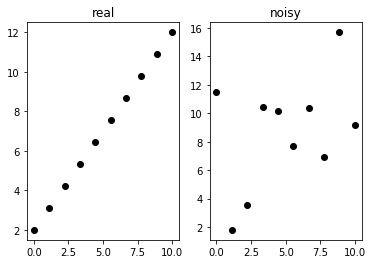

In [142]:
draw_line([t,t_noisy])

In [187]:
t_noisy = add_noise(t,sigma=.5)

In [119]:
from sklearn.linear_model import LinearRegression


In [156]:
x_aug=np.column_stack((t[0],np.ones((10,1))))

reg = LinearRegression().fit(x_aug, t[1])

In [189]:
x_aug=np.column_stack((t_noisy[0],np.ones((10,1))))

reg2 = LinearRegression().fit(x_aug, t_noisy[1])

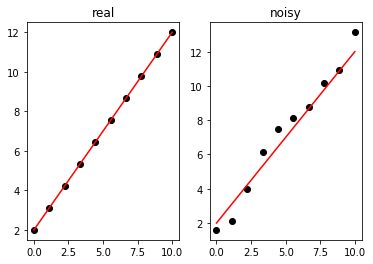

In [190]:
draw_line([t,t_noisy],reg={'0':reg,'1':reg2})

In [191]:
reg.coef_

array([1., 0.])

In [192]:
##noisy
sigma = 0.5
X = np.column_stack((t[0],np.ones((10,1))))
L = 1/sigma * X.T@X

In [193]:
L

array([[703.7037037, 100.       ],
       [100.       ,  20.       ]])

In [196]:
cov=np.linalg.inv(L)
cov

array([[ 0.00490909, -0.02454545],
       [-0.02454545,  0.17272727]])

In [199]:
lines = np.random.randint(10, size=(10, 2))

sigma is 0.6219370690425137 
 line is [6 7]


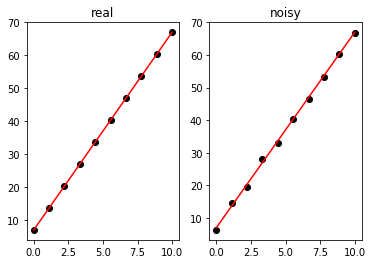

L  : [[565.73545679  80.39398597]
 [ 80.39398597  16.07879719]] 
 , Cov : [[ 0.00610629 -0.03053146]
 [-0.03053146  0.21485099]]  
--------------------------------------------------end of 0--------------------------------------------------
sigma is 0.9748501240054352 
 line is [0 7]


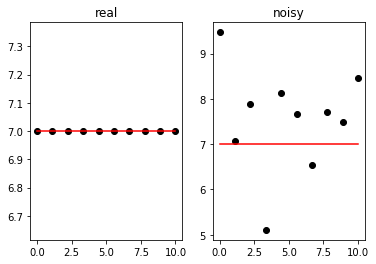

L  : [[360.92917587  51.28993552]
 [ 51.28993552  10.2579871 ]] 
 , Cov : [[ 0.00957126 -0.04785628]
 [-0.04785628  0.33676641]]  
--------------------------------------------------end of 1--------------------------------------------------
sigma is 0.6485325925709349 
 line is [9 3]


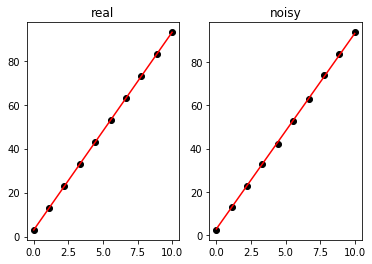

L  : [[542.53534191  77.09712753]
 [ 77.09712753  15.41942551]] 
 , Cov : [[ 0.00636741 -0.03183705]
 [-0.03183705  0.22403853]]  
--------------------------------------------------end of 2--------------------------------------------------
sigma is 0.9672117770884217 
 line is [9 9]


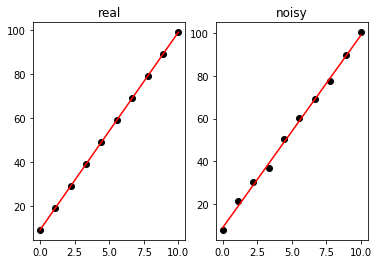

L  : [[363.77953638  51.69498675]
 [ 51.69498675  10.33899735]] 
 , Cov : [[ 0.00949626 -0.04748131]
 [-0.04748131  0.3341277 ]]  
--------------------------------------------------end of 3--------------------------------------------------
sigma is 0.6571025910477889 
 line is [4 1]


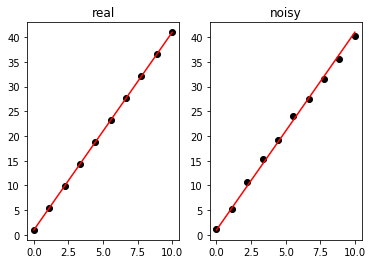

L  : [[535.45954109  76.091619  ]
 [ 76.091619    15.2183238 ]] 
 , Cov : [[ 0.00645155 -0.03225776]
 [-0.03225776  0.22699908]]  
--------------------------------------------------end of 4--------------------------------------------------
sigma is 0.8373663047337202 
 line is [5 1]


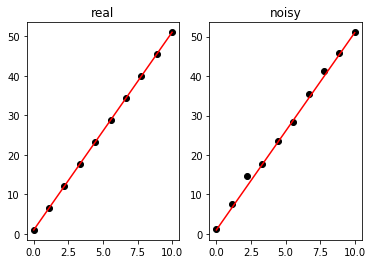

L  : [[420.18869145  59.71102457]
 [ 59.71102457  11.94220491]] 
 , Cov : [[ 0.00822141 -0.04110707]
 [-0.04110707  0.289272  ]]  
--------------------------------------------------end of 5--------------------------------------------------
sigma is 0.043837228759906866 
 line is [8 1]


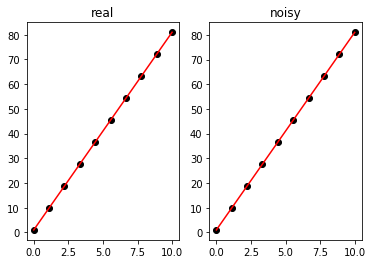

L  : [[8026.32515342 1140.58304812]
 [1140.58304812  228.11660962]] 
 , Cov : [[ 0.0004304  -0.00215201]
 [-0.00215201  0.01514377]]  
--------------------------------------------------end of 6--------------------------------------------------
sigma is 0.620229690778261 
 line is [5 9]


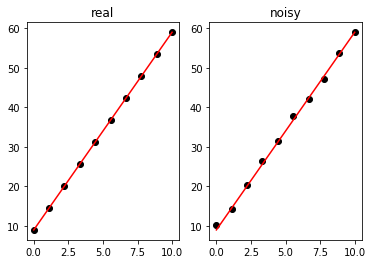

L  : [[567.29282245  80.61529582]
 [ 80.61529582  16.12305916]] 
 , Cov : [[ 0.00608953 -0.03044764]
 [-0.03044764  0.21426117]]  
--------------------------------------------------end of 7--------------------------------------------------
sigma is 1.3850569842088918 
 line is [5 1]


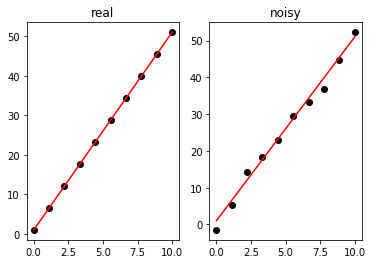

L  : [[254.03420644  36.09959776]
 [ 36.09959776   7.21991955]] 
 , Cov : [[ 0.01359874 -0.06799371]
 [-0.06799371  0.47847423]]  
--------------------------------------------------end of 8--------------------------------------------------
sigma is 0.7522896037692971 
 line is [1 6]


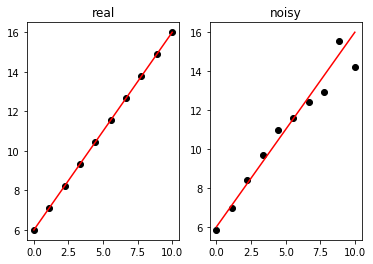

L  : [[467.70798119  66.46376575]
 [ 66.46376575  13.29275315]] 
 , Cov : [[ 0.00738612 -0.03693058]
 [-0.03693058  0.25988186]]  
--------------------------------------------------end of 9--------------------------------------------------


In [213]:
lines = np.random.randint(10, size=(10, 2))
sigmas = np.random.uniform(low=0 , high=1.5 , size=(10))
for i,l in enumerate(list(lines)) :
    sigma=sigmas[i]
    print("sigma is {} \n line is {}".format(sigma , l))
    t = produce_line(list(l))
    x_aug=np.column_stack((t[0],np.ones((10,1))))
    reg = LinearRegression().fit(x_aug, t[1])
    
    t_noisy = add_noise(t,sigma=sigma)
    x_aug=np.column_stack((t_noisy[0],np.ones((10,1))))
    reg2 = LinearRegression().fit(x_aug, t_noisy[1])
    draw_line([t,t_noisy],reg={'0':reg,'1':reg2})
    if(sigma>0.00001):
        X = np.column_stack((t[0],np.ones((10,1))))
        L = 1/sigma * X.T@X
        cov=np.linalg.inv(L)
        print("L  : {} \n , Cov : {}  ".format(L , cov))
    else:
        print("sigma is too small")
    print('-'*50 + str('end of {}'.format(i)) + '-'*50)
    

In [205]:
sigmas = np.random.uniform(low=0 , high=1.5 , size=(10))
sigmas[1]

1.3266851306971184

In [208]:
print('-'*50 + str(20) + '-'*50)

--------------------------------------------------20--------------------------------------------------
